# Proyect Data Analyst

### This proyect consist of analyze two stock market actions (Tesla and GameStop) with the objective of put in practice the knowledge obtained.

# Importation of Libraries.

### In this section I declare all the libraries and importations i going to use during the notebook

In [21]:
# Importation for Stock and data.
import yfinance as yf
import pandas as pd

#Importation for Web Scrapping.
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Importation for dashboard
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tesla Stock DATA

### In this section will going to extract the data from the stock market "Tesla" and looking for their historical data.

In [4]:
#Create the Tesla Ticker Object.
tesla = yf.Ticker("TSLA")

In [8]:
#Extraction of historical data
tesla_data = tesla.history(period = "max" )

In [9]:
# Reset index and display first few rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Gamestop Stock DATA

### In this section will going to extract the data from the stock market "Gamestop" and looking for their historical data.

In [10]:
# Create GameStop ticker object
gamestop = yf.Ticker("GME")

In [11]:
# Extract historical data
gamestop_data = gamestop.history(period="max")

In [12]:
# Reset index and display first few rows
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Tesla Revenue DATA.

### Know will looking for the Revenue data, using webscrapping.

In [14]:
# URL for Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [16]:
# Parse HTML data (using parser by default)
soup = BeautifulSoup(html_data, "html.parser")

In [28]:
# Extract Tesla revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find all tables and extract Tesla data
tables = soup.find_all('table')

# Create a list to store the data
revenue_data = []

# Look for Tesla revenue table
for table in tables:
    if table.find('tbody'):
        rows = table.find('tbody').find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                # Only add if we have actual data (not empty)
                if date and revenue:
                    revenue_data.append({"Date": date, "Revenue": revenue})
        break  # Stop after finding first table

# Convert list to DataFrame
tesla_revenue = pd.DataFrame(revenue_data)

# Display first few rows
tesla_revenue.head()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


# GameStop Reve DATA

### Also the same,  will looking for the Revenue data, using webscrapping.

In [20]:
# Extract GameStop revenue data
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Create a list to store GameStop data
gamestop_revenue_data = []

# Look for GameStop revenue table (usually the second table)
tables = soup.find_all('table')

# GameStop data is typically in the second table
if len(tables) > 1:
    table = tables[1]  # Second table for GameStop
    if table.find('tbody'):
        rows = table.find('tbody').find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                # Only add if we have actual data (not empty)
                if date and revenue:
                    gamestop_revenue_data.append({"Date": date, "Revenue": revenue})

# Convert list to DataFrame
gamestop_revenue = pd.DataFrame(gamestop_revenue_data)

# Display first few rows
gamestop_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


# Dashboard Stock Price vs Revenue

## Final section, where now will put the information in a dashboard for Tesla and Gamestop separately.

### Plot Tesla Stock Graph

In [24]:
#Function to make dashboard
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing = .3)
    
    # Stock Price Plot (remove deprecated parameter)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), 
                             y=stock_data.Close.astype("float"), 
                             name="Share Price"), row=1, col=1)
    
    # Clean revenue data more thoroughly
    revenue_cleaned = revenue_data.Revenue.str.replace('$', '', regex=False)
    revenue_cleaned = revenue_cleaned.str.replace(',', '', regex=False)
    
    # Revenue Plot (remove deprecated parameter)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), 
                             y=revenue_cleaned.astype("float"), 
                             name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (Millions $US)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

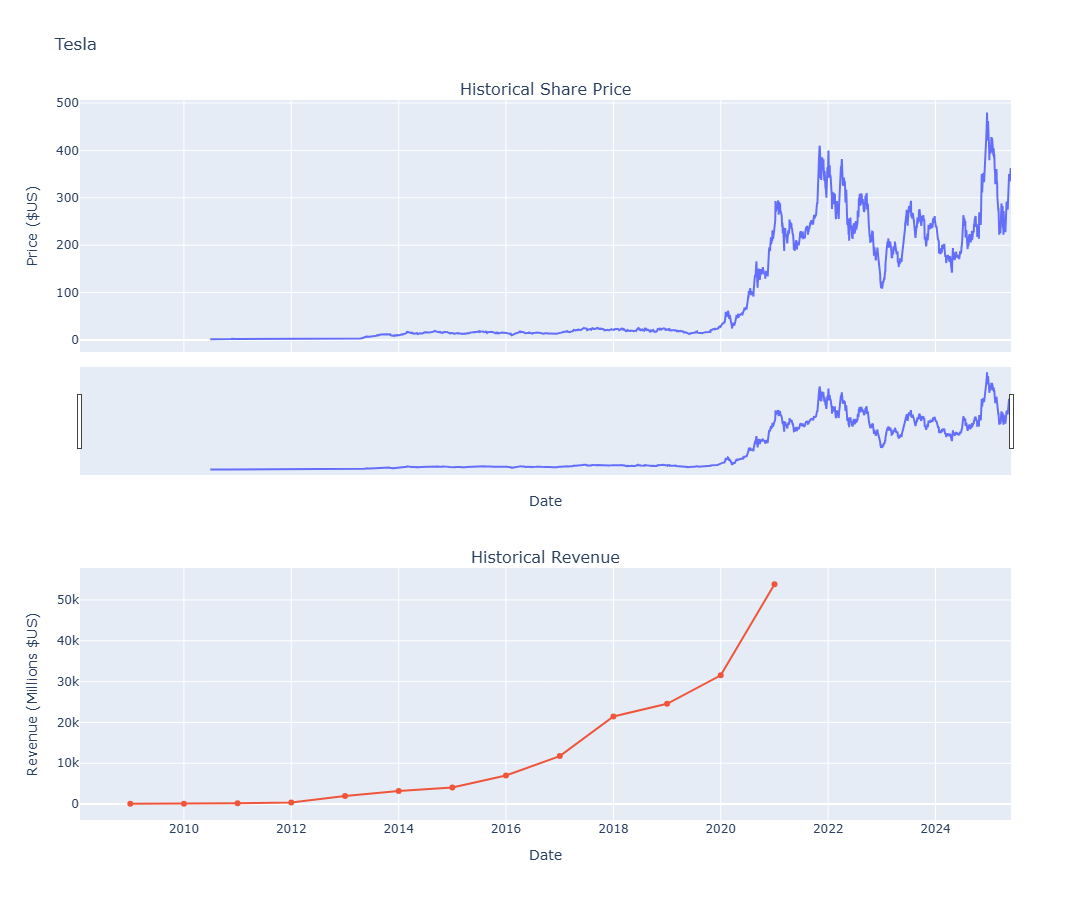

In [25]:
# Create Tesla dashboard
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Plot GameStop Stock Graph

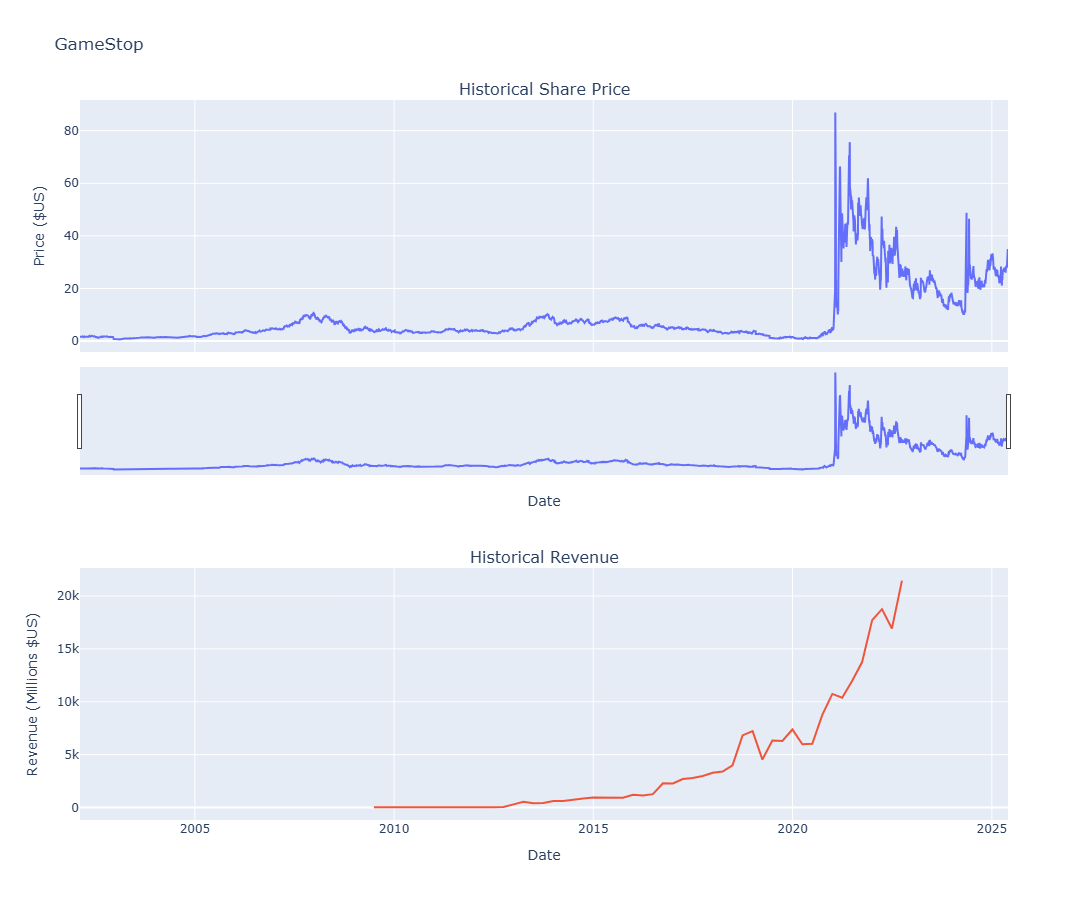

In [27]:
# Create GameStop dashboard  
make_graph(gamestop_data, gamestop_revenue, 'GameStop')